In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
P_DEFAULT = 0.5
N_FLIPS = 100
N_EXPERIMENTS_DEFAULT = 100000

In [3]:
def one_exp(p=P_DEFAULT, n_flips=N_FLIPS):
    random_numbers = np.random.rand(n_flips)
    flips = (random_numbers < p).astype(int)
    num_heads = np.sum(flips)
    max_streak = 0
    current_streak = 0
    for flip in flips:
        if flip == 1:  
            current_streak +=1
            max_streak = max(max_streak, current_streak)
        else:  
            current_streak = 0
    
    has_streak_of_5 = max_streak >= 5
    return {
        'num_heads': num_heads,
        'max_streak': max_streak,
        'has_streak_of_5': has_streak_of_5
    }

In [4]:
def mult_exp(n_experiments=N_EXPERIMENTS_DEFAULT, p=P_DEFAULT, n_flips=N_FLIPS):
    res = []
    for _ in range(n_experiments):
        result = one_exp(p, n_flips)
        res.append(result)
    return pd.DataFrame(res)

In [5]:
print(f" Анализ для монеты с вероятностью орла p={P_DEFAULT} ")
df_res = mult_exp(N_EXPERIMENTS_DEFAULT, P_DEFAULT, N_FLIPS)
mean_heads = df_res['num_heads'].mean()
print(f"1. Среднее количество орлов: {mean_heads:.2f}")
print(f" Теоретическое значение (n*p): {N_FLIPS * P_DEFAULT}")

 Анализ для монеты с вероятностью орла p=0.5 
1. Среднее количество орлов: 50.00
 Теоретическое значение (n*p): 50.0


In [12]:
limit = 60
prob_more_than_limit = (df_res['num_heads'] > limit).mean()
print(f"2. Вероятность получить больше {limit} орлов: {prob_more_than_limit:.4f}")

2. Вероятность получить больше 60 орлов: 0.0177


3. Вероятности и количество для интервалов:
  [0, 10): Вероятность = 0.00000, Количество = 0
  [10, 20): Вероятность = 0.00000, Количество = 0
  [20, 30): Вероятность = 0.00003, Количество = 3
  [30, 40): Вероятность = 0.01759, Количество = 1759
  [40, 50): Вероятность = 0.44200, Количество = 44200
  [50, 60): Вероятность = 0.51149, Количество = 51149
  [60, 70): Вероятность = 0.02884, Количество = 2884
  [70, 80): Вероятность = 0.00005, Количество = 5
  [80, 90): Вероятность = 0.00000, Количество = 0
  [90, 100]: Вероятность = 0.00000, Количество = 0


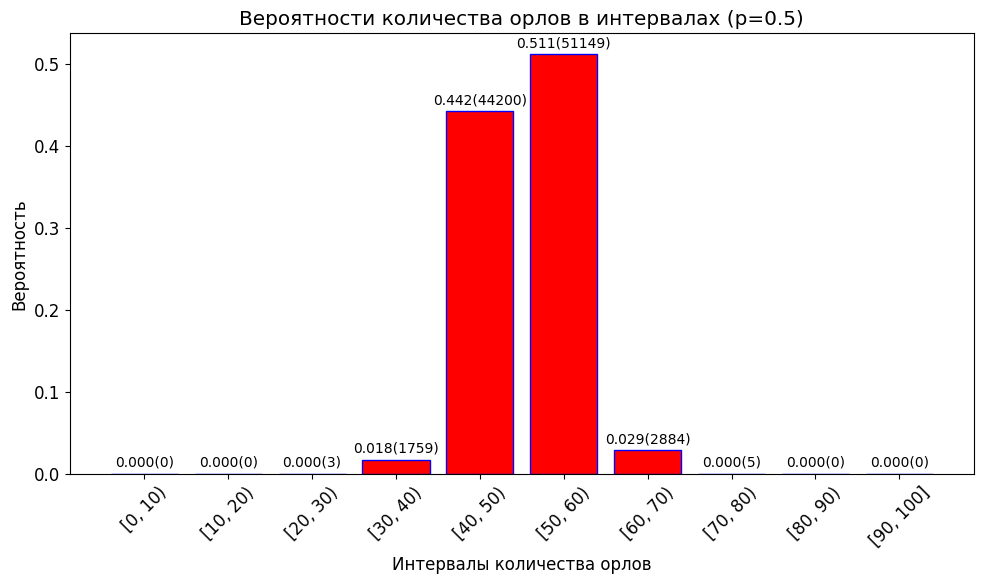

In [7]:
print("3. Вероятности и количество для интервалов:")
intervals = [(i, i+10) for i in range(0, 100, 10)]
interval_probs = []
interval_counts = []
interval_labels = []

for start, end in intervals:
    if end == 100:
        count = df_res[(df_res['num_heads'] >= start) & (df_res['num_heads'] <= end)].shape[0]
        label = f"[{start}, {end}]"
    else:
        count = df_res[(df_res['num_heads'] >= start) & (df_res['num_heads'] < end)].shape[0]
        label = f"[{start}, {end})"

    prob = count / len(df_res)
    interval_probs.append(prob)
    interval_counts.append(count)
    interval_labels.append(label)
    print(f"  {label}: Вероятность = {prob:.5f}, Количество = {count}")

plt.figure(figsize=(10, 6))
x_pos = np.arange(len(interval_labels))
bars = plt.bar(x_pos, interval_probs, color='red', edgecolor='blue')
plt.xlabel('Интервалы количества орлов')
plt.ylabel('Вероятность')
plt.title(f'Вероятности количества орлов в интервалах (p={P_DEFAULT})')
plt.xticks(x_pos, interval_labels, rotation=45)
for bar, prob, count in zip(bars, interval_probs, interval_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(interval_probs)*0.01,
        f'{prob:.3f}({count})', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()


In [8]:
alpha = 0.95
interval_lower = df_res['num_heads'].quantile((1 - alpha) / 2)
interval_upper = df_res['num_heads'].quantile(1 - (1 - alpha) / 2)
interval_width = interval_upper - interval_lower
print(f"4. {alpha*100:.0f}% доверительный интервал для числа орлов: [{interval_lower:.2f}, {interval_upper:.2f}]")
print(f" Ширина интервала: {interval_width:.2f}")



4. 95% доверительный интервал для числа орлов: [40.00, 60.00]
 Ширина интервала: 20.00


In [9]:
prob_streak_5 = df_res['has_streak_of_5'].mean()
print(f"5. Вероятность наличия серии из 5 или более орлов подряд: {prob_streak_5:.4f}")


5. Вероятность наличия серии из 5 или более орлов подряд: 0.8105


Анализ зависимости от вероятности p (для 100 бросков)
p = 0.01: среднее количество орлов = 0.99 (ожидаемое: 1)
p = 0.04: среднее количество орлов = 4.02 (ожидаемое: 4)
p = 0.07: среднее количество орлов = 7.06 (ожидаемое: 7)
p = 0.10: среднее количество орлов = 10.16 (ожидаемое: 10)
p = 0.13: среднее количество орлов = 13.19 (ожидаемое: 13)
p = 0.16: среднее количество орлов = 16.12 (ожидаемое: 16)
p = 0.19: среднее количество орлов = 19.20 (ожидаемое: 19)
p = 0.22: среднее количество орлов = 22.51 (ожидаемое: 22)
p = 0.26: среднее количество орлов = 25.57 (ожидаемое: 26)
p = 0.29: среднее количество орлов = 28.38 (ожидаемое: 29)
p = 0.32: среднее количество орлов = 31.53 (ожидаемое: 32)
p = 0.35: среднее количество орлов = 34.66 (ожидаемое: 35)
p = 0.38: среднее количество орлов = 37.75 (ожидаемое: 38)
p = 0.41: среднее количество орлов = 40.93 (ожидаемое: 41)
p = 0.44: среднее количество орлов = 43.80 (ожидаемое: 44)
p = 0.47: среднее количество орлов = 47.06 (ожидаемое: 47)
p = 0.50

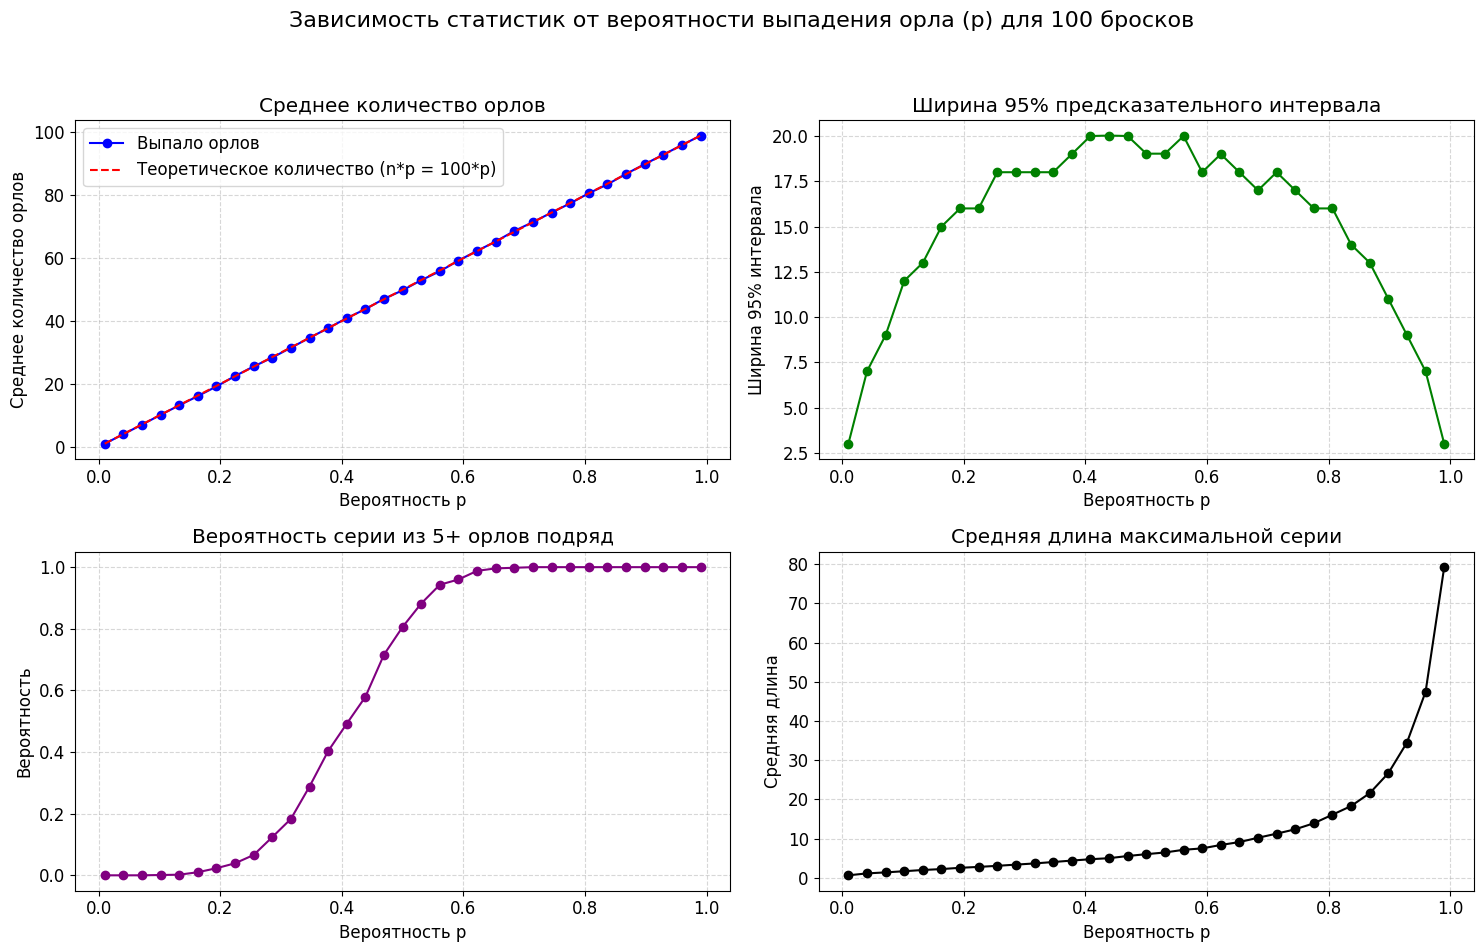

In [10]:
P_VALUES = np.linspace(0.01, 0.99, 33)
print(f"Анализ зависимости от вероятности p (для {N_FLIPS} бросков)")

stat = {
    'p': [],
    'mean_heads': [],
    'interval_width': [],
    'prob_streak_5': [],
    'mean_max_streak': []
}

N_EXP = 1000  

for p in P_VALUES:
    df_p = mult_exp(N_EXP, p, N_FLIPS)
    mean_heads_p = df_p['num_heads'].mean()
    
    print(f"p = {p:.2f}: среднее количество орлов = {mean_heads_p:.2f} (ожидаемое: {N_FLIPS * p:.0f})")
    stat['p'].append(p)
    stat['mean_heads'].append(df_p['num_heads'].mean())
    interval_lower_p = df_p['num_heads'].quantile(0.025)
    interval_upper_p = df_p['num_heads'].quantile(0.975)
    stat['interval_width'].append(interval_upper_p - interval_lower_p)
    stat['prob_streak_5'].append(df_p['has_streak_of_5'].mean())
    stat['mean_max_streak'].append(df_p['max_streak'].mean())

df_stat = pd.DataFrame(stat)

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(f'Зависимость статистик от вероятности выпадения орла (p) для {N_FLIPS} бросков', fontsize=16)

axs[0, 0].plot(df_stat['p'], df_stat['mean_heads'], 'o-', color='blue', label='Выпало орлов')
axs[0, 0].set_xlabel('Вероятность p')
axs[0, 0].set_ylabel('Среднее количество орлов')
axs[0, 0].set_title('Среднее количество орлов')
axs[0, 0].grid(True, linestyle='--', alpha=0.5)
axs[0, 0].plot(df_stat['p'], N_FLIPS * df_stat['p'], '--', color='red', label=f'Теоретическое количество (n*p = {N_FLIPS}*p)')
axs[0, 0].legend()

axs[0, 1].plot(df_stat['p'], df_stat['interval_width'], 'o-', color='green')
axs[0, 1].set_xlabel('Вероятность p')
axs[0, 1].set_ylabel('Ширина 95% интервала')
axs[0, 1].set_title('Ширина 95% предсказательного интервала')
axs[0, 1].grid(True, linestyle='--', alpha=0.5)

axs[1, 0].plot(df_stat['p'], df_stat['prob_streak_5'], 'o-', color='purple')
axs[1, 0].set_xlabel('Вероятность p')
axs[1, 0].set_ylabel('Вероятность')
axs[1, 0].set_title('Вероятность серии из 5+ орлов подряд')
axs[1, 0].grid(True, linestyle='--', alpha=0.5)

axs[1, 1].plot(df_stat['p'], df_stat['mean_max_streak'], 'o-', color='black')
axs[1, 1].set_xlabel('Вероятность p')
axs[1, 1].set_ylabel('Средняя длина')
axs[1, 1].set_title('Средняя длина максимальной серии')
axs[1, 1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()